In [264]:
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [265]:
df=pd.read_csv("timesData.csv")

In [266]:
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [267]:
df1=df.groupby(df["year"])

In [268]:
df1.groups

{2011: Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
            dtype='int64', length=200),
 2012: Int64Index([200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
             ...
             592, 593, 594, 595, 596, 597, 598, 599, 600, 601],
            dtype='int64', length=402),
 2013: Int64Index([ 602,  603,  604,  605,  606,  607,  608,  609,  610,  611,
             ...
              992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001],
            dtype='int64', length=400),
 2014: Int64Index([1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011,
             ...
             1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401],
            dtype='int64', length=400),
 2015: Int64Index([1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411,
             ...
             1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802],
            dtype='int64', len

In [269]:
df["year"].value_counts()

2016    800
2012    402
2015    401
2013    400
2014    400
2011    200
Name: year, dtype: int64

In [270]:
df.describe()
#Average Student ratio =18
#I think max value is an outlier

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [271]:
df.shape

(2603, 14)

In [272]:
## Total data 2603

In [273]:
df2016=df[df["year"]==2016]
df2015=df[df["year"]==2015]

In [274]:
y=df2016["country"].value_counts().reset_index()
z=df2015["country"].value_counts().reset_index()

In [275]:
y

,index,country
0,United States of America,146
1,United Kingdom,77
2,Japan,41
3,China,37
4,Germany,37
...,...,...
67,Nigeria,1
68,Morocco,1
69,Ghana,1
70,Unisted States of America,1


In [276]:
y=y[y["country"]>10]
z=z[z["country"]>5]

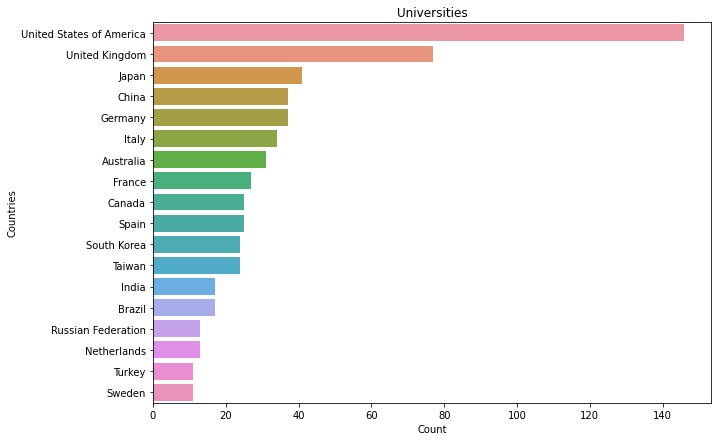

In [277]:
plt.figure(figsize=(10,7))
plt.subplot()
sns.barplot(y=y["index"],x=y["country"])
plt.title("Universities")
plt.ylabel("Countries")
plt.xlabel("Count")
plt.show()

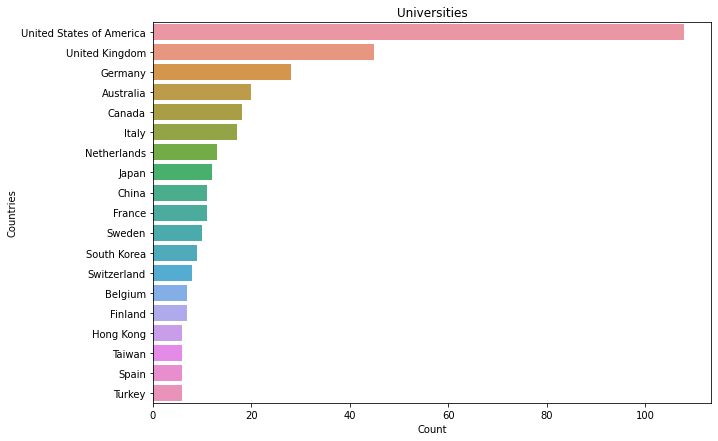

In [278]:
plt.figure(figsize=(10,7))
plt.subplot()
sns.barplot(y=z["index"],x=z["country"])
plt.title("Universities")
plt.ylabel("Countries")
plt.xlabel("Count")
plt.show()

In [279]:
ssr=[]
nus=[]
for i in range(0,800,100):
    ssr.append(df2016.iloc[i:i+200]["student_staff_ratio"].mean())
    nus.append(df2016.iloc[i:i+200]["teaching"].mean())
    #ts.append(df.iloc[i:i+200]["total_score"].mean()))
    
    

In [280]:
ssr#It clearly states that all the world ranked universities have their ratio well below 20.

[17.207575757575754,
 19.40959595959598,
 21.475634517766505,
 21.551776649746195,
 18.820603015075378,
 18.626633165829148,
 18.97587939698493,
 17.841000000000005]

Text(0, 0.5, 'Student_staff_ratio')

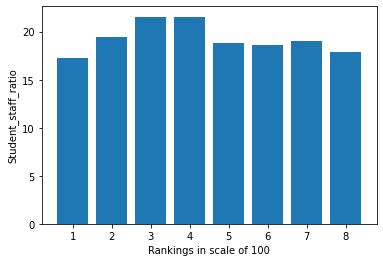

In [281]:
plt.bar(index,ssr)
plt.xlabel("Rankings in scale of 100")
plt.ylabel("Student_staff_ratio")

Text(0, 0.5, 'teaching')

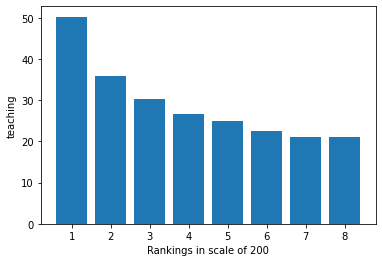

In [282]:
plt.bar(index,nus)
plt.xlabel("Rankings in scale of 200")
plt.ylabel("teaching")


In [283]:
index=np.arange(1,9)

In [284]:
nus

[50.24999999999999,
 35.91200000000002,
 30.249000000000013,
 26.736499999999996,
 24.864500000000007,
 22.469499999999993,
 20.972500000000018,
 21.056999999999995]

In [285]:
df[df["student_staff_ratio"]>100]#only these have student ratio above 

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2413,601-800,Anadolu University,Turkey,12.2,14.3,22.6,10.9,100.0,-,"379,231",162.6,1%,78 : 22,2016
2562,601-800,University of South Africa,South Africa,18.4,28.7,11.3,9.4,28.8,-,"197,102",108.5,9%,65 : 35,2016


In [286]:
df.iloc[2403:2414]["student_staff_ratio"]

2403     13.0
2404     15.6
2405     17.0
2406     11.3
2407     25.1
2408     23.3
2409     33.0
2410     10.5
2411     14.1
2412      6.6
2413    162.6
Name: student_staff_ratio, dtype: float64

In [287]:
df.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [289]:
df[df["total_score"]=="-"]#1200 rows doesnt have value for totalscore

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
400,201-225,Autonomous University of Barcelona,Spain,33.7,45.9,27.9,57.9,37.0,-,"30,538",12.3,10%,59 : 41,2012
401,201-225,Bilkent University,Turkey,27.9,48.5,22.3,60.8,29.4,-,NaN,NaN,NaN,NaN,2012
402,201-225,Cardiff University,United Kingdom,28.9,67.8,34.0,51.7,35.5,-,"23,347",13.1,23%,57 : 43,2012
403,201-225,Colorado School of Mines,United States of America,24.6,38.4,22.8,63.7,99.4,-,"5,287",18.2,12%,26 : 74,2012
404,201-225,Nagoya University,Japan,45.5,21.2,39.2,43.8,33.1,-,"15,529",7.9,10%,29 : 71,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


In [290]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [291]:
df.corr()

,teaching,research,citations,student_staff_ratio,year
teaching,1.000000,0.913120,0.503867,-0.282630,-0.278108
research,0.913120,1.000000,0.525264,-0.198841,-0.274451
citations,0.503867,0.525264,1.000000,-0.137737,-0.173544
student_staff_ratio,-0.282630,-0.198841,-0.137737,1.000000,0.060728
year,-0.278108,-0.274451,-0.173544,0.060728,1.000000


In [292]:
df["world_rank"]

0             1
1             2
2             3
3             4
4             5
         ...   
2598    601-800
2599    601-800
2600    601-800
2601    601-800
2602    601-800
Name: world_rank, Length: 2603, dtype: object

In [293]:
df["year"].unique()

array([2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [294]:
df[df["world_rank"]=="1"]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
200,1,California Institute of Technology,United States of America,95.7,56.0,98.2,99.9,97.0,94.8,"2,243",6.9,27%,33 : 67,2012
602,1,California Institute of Technology,United States of America,96.3,59.8,99.4,99.7,95.6,95.5,"2,243",6.9,27%,33 : 67,2013
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1402,1,California Institute of Technology,United States of America,92.2,67.0,98.1,99.7,89.1,94.3,"2,243",6.9,27%,33 : 67,2015
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016


In [295]:
df1.groups

{2011: Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
            dtype='int64', length=200),
 2012: Int64Index([200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
             ...
             592, 593, 594, 595, 596, 597, 598, 599, 600, 601],
            dtype='int64', length=402),
 2013: Int64Index([ 602,  603,  604,  605,  606,  607,  608,  609,  610,  611,
             ...
              992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001],
            dtype='int64', length=400),
 2014: Int64Index([1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011,
             ...
             1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401],
            dtype='int64', length=400),
 2015: Int64Index([1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411,
             ...
             1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802],
            dtype='int64', len

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
df2016.isnull().sum()

world_rank                 0
university_name            0
country                    0
teaching                   0
international              0
research                   0
citations                  0
income                     0
total_score                0
num_students               7
student_staff_ratio        7
international_students    10
female_male_ratio         61
year                       0
dtype: int64

In [298]:
df2016.isin(['-']).sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                     37
total_score               600
num_students                0
student_staff_ratio         0
international_students      0
female_male_ratio           3
year                        0
dtype: int64

In [299]:
df2016["student_staff_ratio"].fillna(method="ffill",inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [300]:
df2016["international_students"].fillna(method="ffill",inplace=True)

In [301]:
df2016[df2016["student_staff_ratio"].isnull()]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year


In [302]:
#df2016.iloc[22]["student_staff_ratio"]=ssr[0] not working

In [303]:
ssr

[17.207575757575754,
 19.40959595959598,
 21.475634517766505,
 21.551776649746195,
 18.820603015075378,
 18.626633165829148,
 18.97587939698493,
 17.841000000000005]

In [304]:
df2016["num_students"].fillna(method="ffill",inplace=True)

In [305]:
df2016["income"].fillna(method="ffill",inplace=True)

In [306]:
df2016.corr()

,teaching,research,citations,student_staff_ratio,year
teaching,1.000000,0.907430,0.565086,-0.185919,NaN
research,0.907430,1.000000,0.618008,-0.039053,NaN
citations,0.565086,0.618008,1.000000,-0.035915,NaN
student_staff_ratio,-0.185919,-0.039053,-0.035915,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN


In [307]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_log_error,accuracy_score
lr=LinearRegression()
rfc=RandomForestClassifier()

In [322]:
df2016["world_rank"]

1803          1
1804          2
1805          3
1806          4
1807          5
         ...   
2598    601-800
2599    601-800
2600    601-800
2601    601-800
2602    601-800
Name: world_rank, Length: 800, dtype: object

In [363]:
df2016["t"]=m

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [362]:
m=[]
for i in range(1,801):
    m.append(i)

In [329]:
m

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [342]:
df2016

,level_0,index,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,word_rank,t
0,0,1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016,800,0
1,1,1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46 : 54,2016,800,1
2,2,1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42 : 58,2016,800,2
3,3,1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,"18,812",11.8,34%,46 : 54,2016,800,3
4,4,1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,"11,074",9.0,33%,37 : 63,2016,800,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016,800,795
796,796,2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016,800,796
797,797,2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016,800,797
798,798,2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016,800,798


In [348]:
del df2016["world_rank"]

In [365]:
df2016.corr()["t"]

level_0                1.000000
teaching              -0.744161
research              -0.799810
citations             -0.894830
student_staff_ratio    0.018014
year                        NaN
word_rank                   NaN
t                      1.000000
Name: t, dtype: float64

In [367]:
df2016.rename(columns={"t":"World_rank"})

,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,word_rank,World_rank
0,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016,800,1
1,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46 : 54,2016,800,2
2,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42 : 58,2016,800,3
3,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,"18,812",11.8,34%,46 : 54,2016,800,4
4,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,"11,074",9.0,33%,37 : 63,2016,800,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016,800,796
796,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016,800,797
797,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016,800,798
798,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016,800,799


In [385]:
df2016.isin(['-']).sum()

university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                     37
total_score               600
num_students                0
student_staff_ratio         0
international_students      0
female_male_ratio           3
year                        0
word_rank                   0
t                           0
dtype: int64

In [369]:
df2016.columns

Index(['university_name', 'country', 'teaching', 'international', 'research',
       'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year', 'word_rank', 't'],
      dtype='object')

In [371]:
df2016["income"].fillna(method="ffill",inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [409]:
df2016["num_students"]=df2016.num_students.convert_objects(convert_numeric=True)

AttributeError: 'Series' object has no attribute 'convert_objects'

In [391]:
X=df2016[['teaching', 'international', 'research',
       'citations']]

In [392]:
y=df2016["t"]

In [394]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [395]:
rfc.fit(X_train,y_train)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [399]:
lra=lr.predict(X_test)
rfca=rfc.predict(X_test)

In [402]:
from sklearn.metrics import mean_absolute_error

In [403]:
mean_absolute_error(y_test,lra)

52.681269650223626

In [406]:
lr.coef_

array([-2.24283959, -1.13331964, -2.78457197, -5.13792377])